In [ ]:
'''
• Найти данные (без повторов в группе). Предобработать, если необходимо.
• Реализовать алгоритмы кластеризации: k-means, иерархическая, DBSCAN
• Для поиска количества кластеров для k-means использовать метод «локтя» и коэффициент силуэта
• Отрисовать графики полученных кластеров
• Для иерархической кластеризации отрисовать дендрограмму
'''

'\n• Найти данные (без повторов в группе). Предобработать, если необходимо.\n• Реализовать алгоритмы кластеризации: k-means, иерархическая, DBSCAN\n• Для поиска количества кластеров для k-means использовать метод «локтя» и коэффициент силуэта\n• Отрисовать графики полученных кластеров\n• Для иерархической кластеризации отрисовать дендрограмму\n'

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans, DBSCAN, AgglomerativeClustering # алгоритмы кластеризации
from scipy.cluster.hierarchy import dendrogram, linkage #для отрисовки дендрограммы
from sklearn.preprocessing import MinMaxScaler, StandardScaler #нормализация и стандартизация, можно сравнить результаты кластеризации
from sklearn.metrics import silhouette_score #коэффициент силуэта

In [ ]:
data = pd.read_csv("Mall_Customers.csv")

In [ ]:
data

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40
...,...,...,...,...,...
195,196,Female,35,120,79
196,197,Female,45,126,28
197,198,Male,32,126,74
198,199,Male,32,137,18


In [ ]:
data = data.drop(["CustomerID", "Gender"], axis=1)

data

,Age,Annual Income (k$),Spending Score (1-100)
0,19,15,39
1,21,15,81
2,20,16,6
3,23,16,77
4,31,17,40
...,...,...,...
195,35,120,79
196,45,126,28
197,32,126,74
198,32,137,18


In [ ]:
#from sklearn.preprocessing import MinMaxScaler
#scaler = MinMaxScaler()

In [ ]:
#x = scaler.fit_transform(data)
#names = data.columns

In [ ]:
#scaled_data = pd.DataFrame(x, columns=names)
#scaled_data

# Метод локтя и коэффициент силуэта


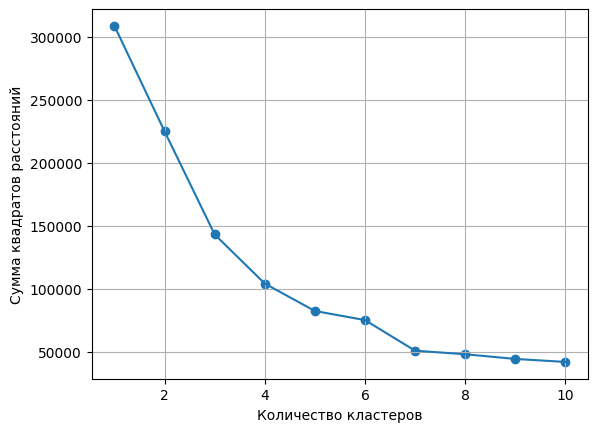

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

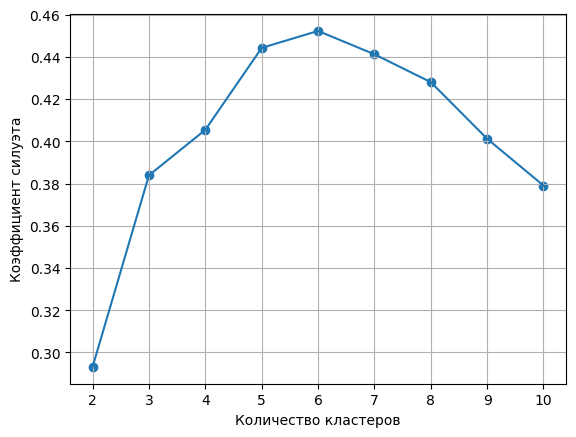

In [ ]:
X = data
# Рассчитываем сумму квадратов расстояний для разного количества кластеров
sse = []
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, random_state=0, n_init  = 'auto')
    kmeans.fit(X)
    sse.append(kmeans.inertia_)

# Визуализируем метод локтя
plt.plot(range(1, 11), sse)
plt.scatter(range(1, 11), sse)
plt.grid()
plt.xlabel('Количество кластеров')
plt.ylabel('Сумма квадратов расстояний')
plt.show()

# Рассчитываем коэффициент силуэта для разного количества кластеров
silhouette_scores = []
for k in range(2, 11):
    kmeans = KMeans(n_clusters=k, random_state=0)
    cluster_labels = kmeans.fit_predict(X)
    silhouette_avg = silhouette_score(X, cluster_labels)
    silhouette_scores.append(silhouette_avg)

# Визуализируем коэффициент силуэта
plt.plot(range(2, 11), silhouette_scores)
plt.scatter(range(2, 11), silhouette_scores)
plt.grid()
plt.xlabel('Количество кластеров')
plt.ylabel('Коэффициент силуэта')
plt.show()

#k_means

In [ ]:
kmeans = KMeans(n_clusters = 6, n_init  = 'auto')
kmeans.fit(X)

labels = kmeans.labels_

In [ ]:
import plotly.express as px

fig = px.scatter_3d(X, x = 'Age', y='Annual Income (k$)', z='Spending Score (1-100)',
              color=labels)
fig.show()

#DBSCAN

In [ ]:
dbscan = DBSCAN(eps=15, min_samples=10)
dbscan.fit(X)


labels = dbscan.labels_
fig = px.scatter_3d(X, x=X['Age'], y=X['Annual Income (k$)'], z=X['Spending Score (1-100)'], color=labels)
fig.show()

#Иерархическая кластеризация

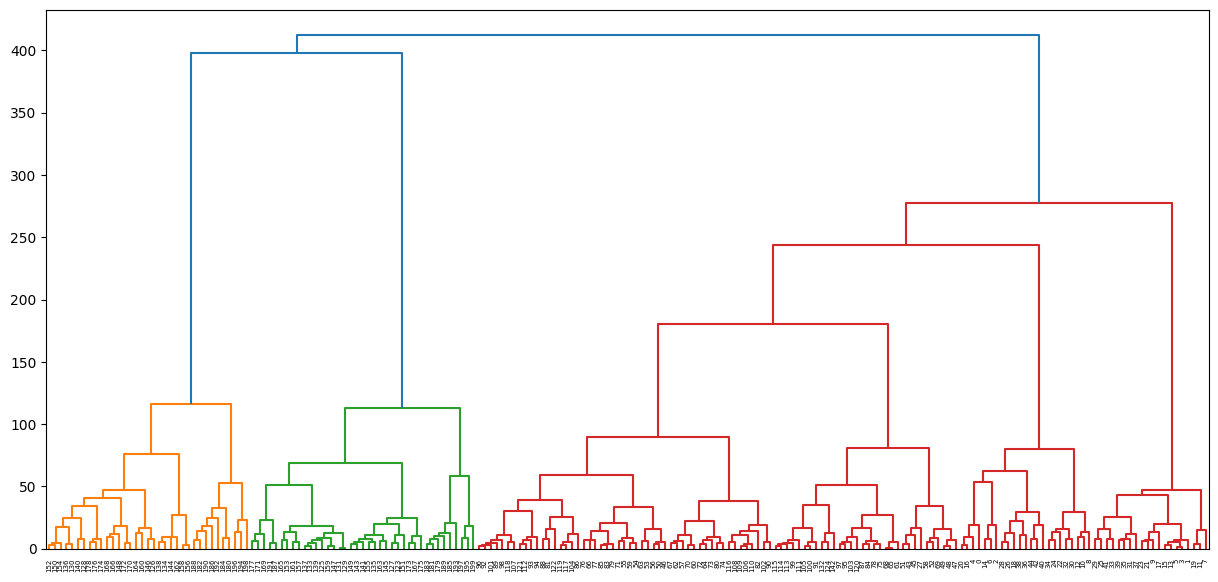

In [ ]:
linked = linkage(X, 'ward')
plt.figure(figsize=(15, 7))
dendrogram(linked,
            orientation='top',
            distance_sort='descending',
            show_leaf_counts=True)
plt.show()